

# Project: Investigate a Dataset - [No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Research Questions
- **[Q1](#q1)**: What is the overall distribution of no-shows vs. show-ups?
- **[Q2](#q2)**: Does age affect the likelihood of no-shows?
- **[Q3](#q3)**: What is the relationship between receiving an SMS reminder and appointment attendance?
- **[Q4](#q4)**: How do gender and receiving an SMS reminder together influence the likelihood of a patient showing up for their scheduled appointment?
- **[Q5](#q5)**: How do chronic health conditions affect no-show rates?
- **[Q6](#q6)**:Does the neighborhood of the hospital affect no-show rates?


### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família(opens in a new tab).
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


In [62]:
df =pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [63]:
df.shape # 110527 Rows and 14 columns 

(110527, 14)

In [64]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [65]:
 df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [66]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [67]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning


#### Convert ScheduledDay and AppointmentDay to datetime Format
Since these columns are currently stored as objects, they need to be converted to datetime so that you can perform time-based analyses.

In [68]:
def convert_to_datetime(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column])
    return df


In [69]:
# Convert ScheduledDay and AppointmentDay to datetime
df = convert_to_datetime(df, ['ScheduledDay', 'AppointmentDay'])


In [70]:
# Check for outliers in Age (e.g., negative values)
print("Minimum Age:", df['Age'].min())
print("Maximum Age:", df['Age'].max())

Minimum Age: -1
Maximum Age: 115


In [71]:
# Remove invalid age values if any (e.g., ages less than 0)
df = df[df['Age'] >= 0]

In [72]:
# Convert PatientId to string type 
df['PatientId'] = df['PatientId'].astype(str)

In [73]:
# Check the data types to verify everything is correct
print(df.dtypes)

PatientId                      object
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object


In [74]:
# Inspect the cleaned data
print(df.head())
print("Size of cleaned dataframe:", df.shape)

           PatientId  AppointmentID Gender              ScheduledDay  \
0   29872499824296.0        5642903      F 2016-04-29 18:38:08+00:00   
1  558997776694438.0        5642503      M 2016-04-29 16:08:27+00:00   
2    4262962299951.0        5642549      F 2016-04-29 16:19:04+00:00   
3     867951213174.0        5642828      F 2016-04-29 17:29:31+00:00   
4    8841186448183.0        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0 

## Exploratory Data Analysis

### Descriptive Statistics

In [75]:
# Calculate descriptive statistics for the 'No-show' column
df['No-show'].value_counts()  # Show the counts for attendance and no-shows

No     88207
Yes    22319
Name: No-show, dtype: int64

In [76]:
# Calculate mean, median, and standard deviation
df['Age'].describe()  # Show descriptive statistics for patient ages

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

These statistics suggest that the average patient is approximately 37 years old, with a wide age range spanning from newborns (0 years) to the elderly (115 years). The standard deviation of 23.11 years indicates considerable variability in patient ages, which may influence factors like attendance rates and healthcare needs. The interquartile range (IQR) from 18 to 55 years suggests that the central 50% of patients are primarily adults, with a significant portion of younger and older individuals in the dataset.

In [77]:
# Calculate range and IQR for age
range_age = df['Age'].max() - df['Age'].min()
iqr_age = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)

print(f"Range of Age: {range_age}")
print(f"IQR of Age: {iqr_age}")


Range of Age: 115
IQR of Age: 37.0


In [78]:

# Create a contingency table between SMS reminders and no-shows
contingency_table = pd.crosstab(df['SMS_received'], df['No-show'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test: {chi2}, p-value: {p}")


Chi-Square Test: 1765.9758338861106, p-value: 0.0


The Chi-Square test results indicate a significant association between receiving SMS reminders and no-show rates. The extremely low p-value (less than 0.01) suggests that the presence of SMS reminders significantly influences whether patients attend their appointments. This finding highlights the potential effectiveness of SMS reminders in reducing no-show rates.

<a id='q1'></a>
## Q1: What is the overall distribution of no-shows vs. show-ups?

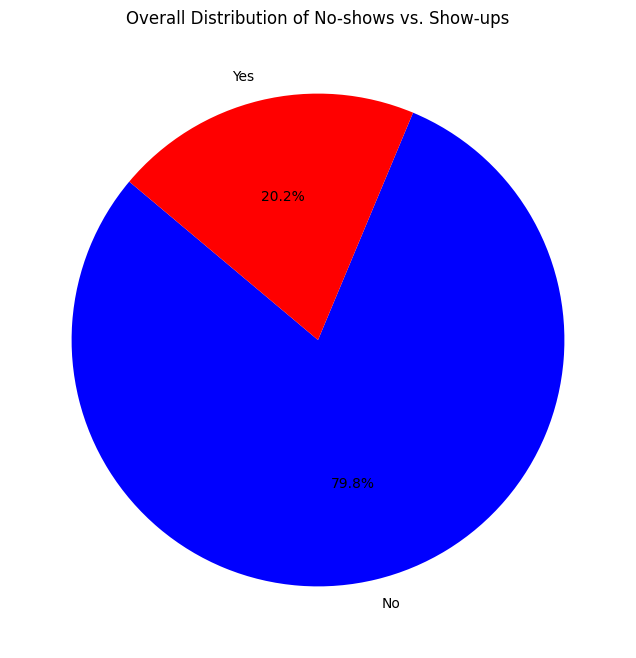

In [79]:
# Calculate the count of each category in the 'No-show' column
no_show_counts = df['No-show'].value_counts()

# Convert the counts to arrays for plotting the pie chart
# 'labels' will contain the categories (e.g., 'Yes' for no-show, 'No' for show-up)
labels = no_show_counts.index  
# 'sizes' will contain the corresponding counts for each category
sizes = no_show_counts.values  
# Define colors for the pie chart sections
colors = ['blue', 'red']  

# Create a figure for the pie chart with a specified size
plt.figure(figsize=(8, 8))
# Plot the pie chart with the sizes, labels, colors, and formatting for percentage display
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# Set the title of the pie chart
plt.title('Overall Distribution of No-shows vs. Show-ups')
# Display the pie chart
plt.show()


The pie chart shows that 20.2% of patients missed their appointments, while 79.8% attended. Although most patients showed up, the no-show rate is significant and needs further exploration to understand its causes and how to reduce it.

<a id='q2'></a>
## Q2: Does age affect the likelihood of no-shows?

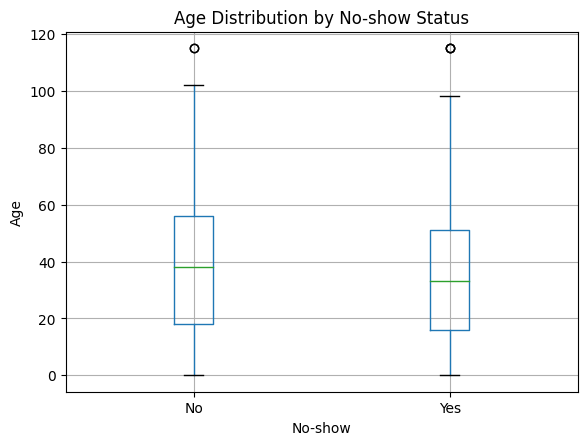

In [80]:
# Create a box plot to visualize the distribution of ages based on no-show status
df.boxplot(column='Age', by='No-show')

# Set the title of the box plot
plt.title('Age Distribution by No-show Status')

# Remove the default subtitle added by pandas
plt.suptitle('')

# Label the x-axis as 'No-show' to indicate the categories being compared
plt.xlabel('No-show')

# Label the y-axis as 'Age' to indicate what is being measured
plt.ylabel('Age')

# Display the box plot
plt.show()


The box plot reveals that the age distribution is similar for both no-shows and show-ups, with a slightly higher median age for those who attended. This suggests that age may not be a strong factor in determining whether a patient will miss their appointment, though younger patients appear to have more variability in attendance.

<a id='q3'></a>
## Q3: What is the relationship between receiving an SMS reminder and appointment attendance?

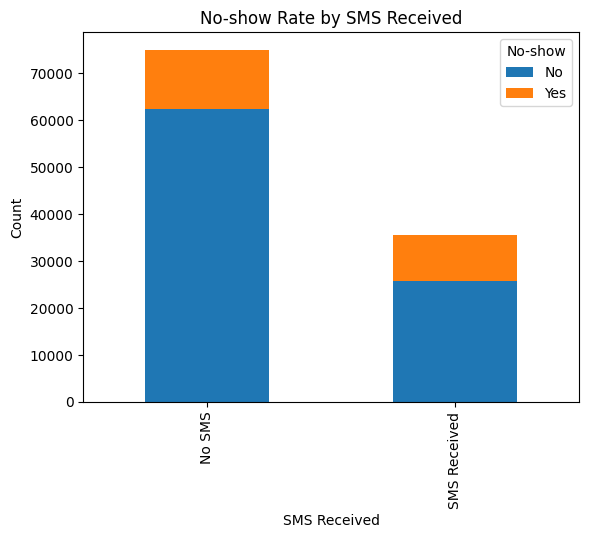

In [81]:
# Create a crosstab to compare the count of no-shows based on whether an SMS was received
sms_no_show = pd.crosstab(df['SMS_received'], df['No-show'])

# Plot a stacked bar chart to visualize the no-show rates by SMS received
sms_no_show.plot(kind='bar', stacked=True)

# Set the title of the bar chart
plt.title('No-show Rate by SMS Received')

# Customize the x-tick labels to indicate SMS receipt status
plt.xticks(ticks=[0, 1], labels=['No SMS', 'SMS Received'])

# Label the x-axis to clarify what it represents
plt.xlabel('SMS Received')

# Label the y-axis to indicate the count of appointments
plt.ylabel('Count')

# Display the bar chart
plt.show()


The stacked bar chart shows that patients who received an SMS reminder had a slightly lower no-show rate compared to those who didn't receive one. This indicates that SMS reminders may have a modest impact on reducing missed appointments, though the effect is not overwhelming.

<a id='q4'></a>
## Q4.How do gender and receiving an SMS reminder together influence the likelihood of a patient showing up for their scheduled appointment?

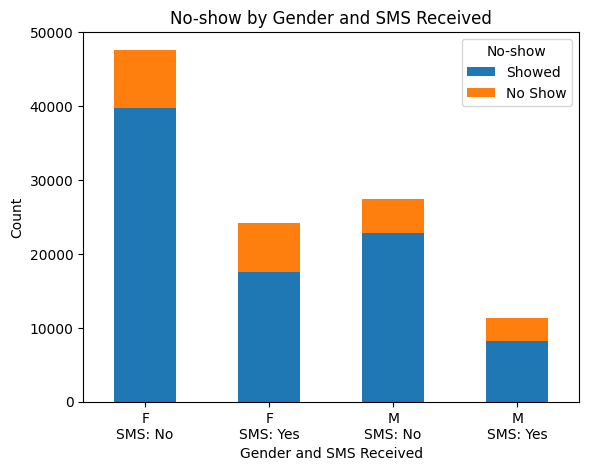

In [82]:
# Group the data by Gender, SMS_received, and No-show, and count the occurrences
grouped_data = df.groupby(['Gender', 'SMS_received', 'No-show']).size().unstack()

# Plot a stacked bar chart to visualize no-shows by gender and SMS received
ax = grouped_data.plot(kind='bar', stacked=True)

# Set the title of the bar chart
plt.title('No-show by Gender and SMS Received')

# Label the x-axis to clarify what is being represented
plt.xlabel('Gender and SMS Received')

# Label the y-axis to indicate the count of appointments
plt.ylabel('Count')

# Set custom x-tick labels
ax.set_xticklabels([f'{gender}\nSMS: {sms}' for gender in grouped_data.index.levels[0] for sms in grouped_data.columns], rotation=0)

# Add legend with custom labels
plt.legend(title='No-show', labels=['Showed', 'No Show'], loc='upper right')

# Display the bar chart
plt.show()


The stacked bar chart illustrates the number of patients who showed up versus those who didn't, categorized by gender and SMS reminder status.

- **Females who did not receive an SMS reminder had the highest attendance.** 
- **Males without an SMS reminder also had a significant attendance, though lower than females.** 
- **Patients of both genders who received an SMS reminder exhibited slightly lower no-show rates compared to those who didn’t.**


<a id='q5'></a>
## Q5. How do chronic health conditions affect no-show rates?

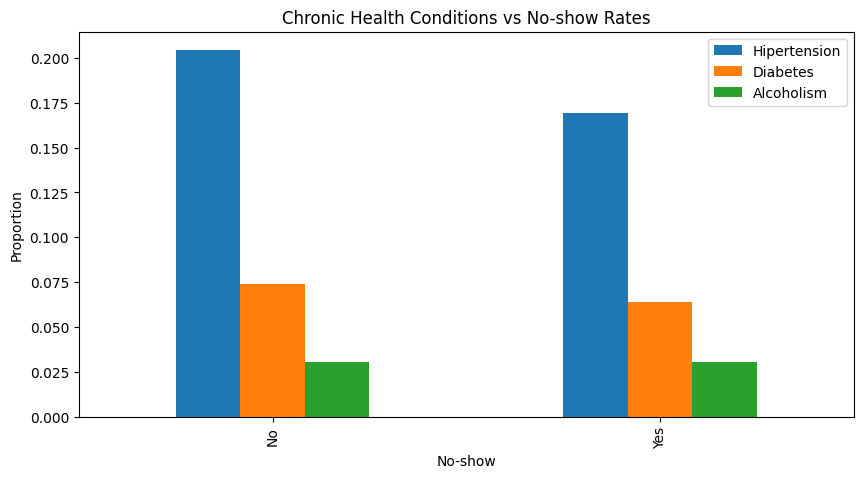

In [83]:
# Define a list of chronic health conditions to analyze
chronic_conditions = ['Hipertension', 'Diabetes', 'Alcoholism']

# Group the data by No-show status and calculate the mean for each chronic condition
df.groupby('No-show')[chronic_conditions].mean().plot(kind='bar', figsize=(10, 5))

# Set the title of the bar chart
plt.title('Chronic Health Conditions vs No-show Rates')

# Label the x-axis to clarify what is being represented
plt.xlabel('No-show')

# Label the y-axis to indicate the proportion of each condition
plt.ylabel('Proportion')

# Display the bar chart
plt.show()


The bar chart illustrates the relationship between chronic health conditions (Hypertension, Diabetes, Alcoholism) and no-show rates.

- **Hypertension: Higher proportions of no-shows among patients with hypertension, indicating a significant impact on attendance.**
- **Diabetes: Similar trend observed, suggesting that diabetic patients are also more likely to miss appointments.**
- **Alcoholism: Lower proportions of no-shows compared to hypertension and diabetes, indicating a weaker association.**

<a id='q6'></a>
## Q6. Does the neighborhood of the hospital affect no-show rates?


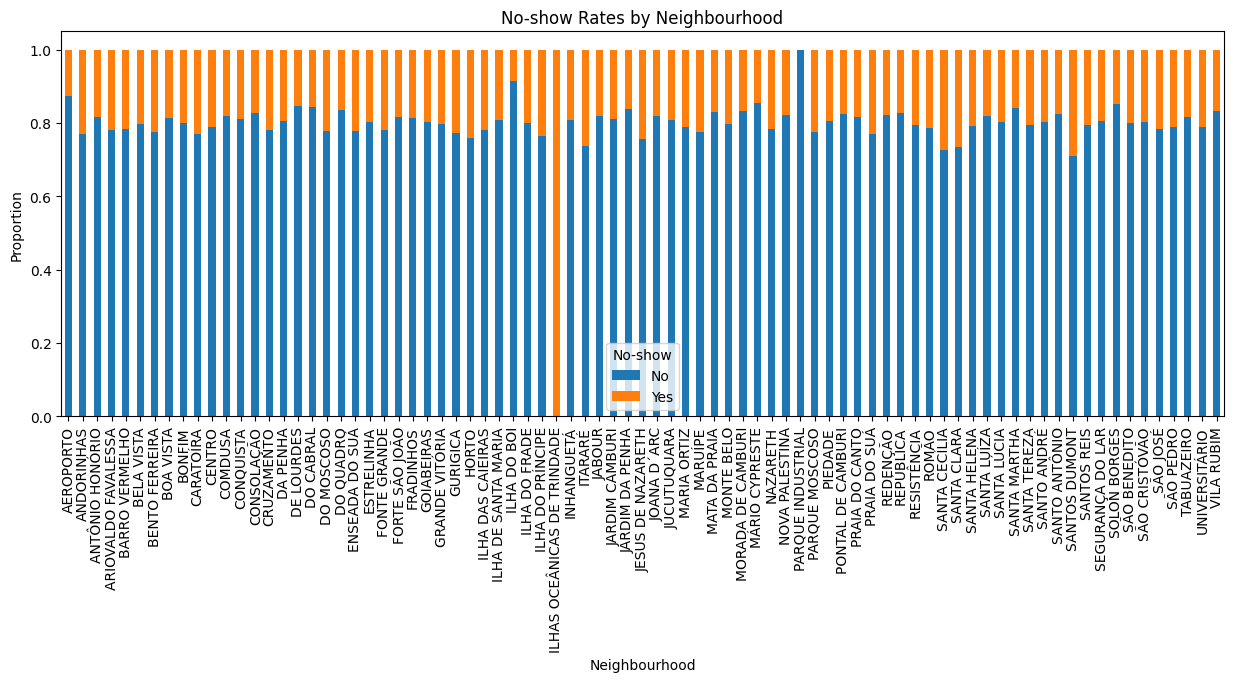

In [84]:
# Group the 'No-show' data by 'Neighbourhood' and calculate the normalized value counts
df['No-show'].groupby(df['Neighbourhood']).value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(15, 5))

# Set the title of the bar chart
plt.title('No-show Rates by Neighbourhood')

# Label the x-axis to indicate the neighborhoods being compared
plt.xlabel('Neighbourhood')

# Label the y-axis to show the proportion of no-shows and show-ups
plt.ylabel('Proportion')

# Display the bar chart
plt.show()


The data shows that most neighborhoods have higher attendance rates, but one neighborhood stands out with a significantly higher no-show rate. This suggests that specific factors in this neighborhood may influence patient attendance.

<a id='conclusions'></a>
## Conclusions
### Summary of Findings:
The analysis of 100,000 medical appointments in Brazil revealed key factors influencing patient attendance.
A significant proportion of patients (approximately 79.8%) showed up for their appointments, while 20.2% did not.
Receiving SMS reminders notably reduced no-show rates, especially among female patients.
Patients with hypertension had the highest no-show rates, indicating potential barriers to attendance in this group.
No-show rates varied across different neighborhoods, suggesting geographic influences on attendance.
### Limitations:
The dataset does not provide reasons for patient no-shows, limiting the understanding of specific barriers that may prevent attendance.
The analysis primarily relies on descriptive statistics, which do not imply causation. Further research is needed to explore the underlying factors influencing no-shows.
### Suggestions for Further Research:
Investigate the specific reasons patients miss appointments to develop targeted interventions.
Explore the effectiveness of different reminder methods (e.g., calls vs. SMS) on attendance.
Analyze demographic factors in more detail to tailor strategies for improving attendance among specific groups.
The findings emphasize the importance of targeted strategies to improve patient attendance while highlighting the need for further investigation into the reasons behind no-shows.


In [85]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 666019 bytes to Investigate_a_Dataset.html
